### Introduction to Classification and K-Nearest Neighbors

**Objectives**

- Identify *Classification* problems in supervised learning
- Use `KNeighborsClassifier` to model classification problems using scikitlearn
- Use `StandardScaler` to prepare data for KNN models
- Use `Pipeline` to combine the preprocessing
- Use `KNNImputer` to impute missing values


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.datasets import make_blobs

Today you will work together with a neighbor to answer questions based on the code in the notebook.  Use the form [here](https://forms.gle/Vb2ei7TkvVr4XxfW8) to record your work.

### A Second Regression Model

In [3]:
#creating synthetic dataset
x = np.linspace(0, 5, 100)
y = 3*x + 4 + np.random.normal(scale = 3, size = len(x))
df = pd.DataFrame({'x': x, 'y': y})
df.head()

x         y
0  0.000000  3.669170
1  0.050505  4.575091
2  0.101010  1.898510
3  0.151515  5.199555
4  0.202020  2.297592

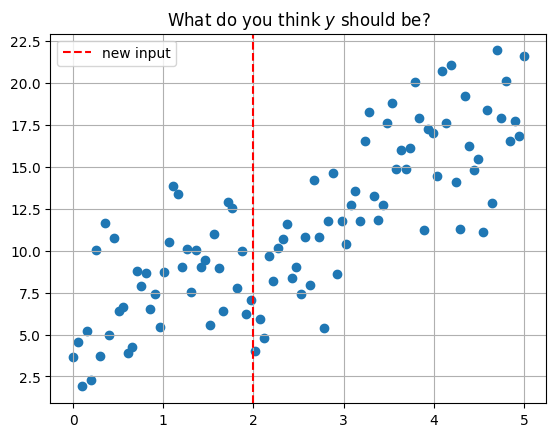

In [4]:
#plot data and new observation
plt.scatter(x, y)
plt.axvline(2, color='red', linestyle = '--', label = 'new input')
plt.grid()
plt.legend()
plt.title(r'What do you think $y$ should be?');

### KNearest Neighbors

Predict the average of the $k$ nearest neighbors.  One way to think about "nearest" is euclidean distance.  We can determine the distance between each data point and the new data point at $x = 2$ with `np.linalg.norm`.  This is a more general way of determining the euclidean distance between vectors. 

In [5]:
#compute distance from each point 
#to new observation
df['distance from x = 2'] = np.linalg.norm(df[['x']] - 2, axis = 1)
df.head()

x         y  distance from x = 2
0  0.000000  3.669170             2.000000
1  0.050505  4.575091             1.949495
2  0.101010  1.898510             1.898990
3  0.151515  5.199555             1.848485
4  0.202020  2.297592             1.797980

In [6]:
#five nearest points
df.nsmallest(5, 'distance from x = 2')

x         y  distance from x = 2
40  2.020202  4.009398             0.020202
39  1.969697  7.087389             0.030303
41  2.070707  5.916379             0.070707
38  1.919192  6.202836             0.080808
42  2.121212  4.774703             0.121212

In [7]:
#average of five nearest points
df.nsmallest(5, 'distance from x = 2')['y'].mean()

5.598140955501936

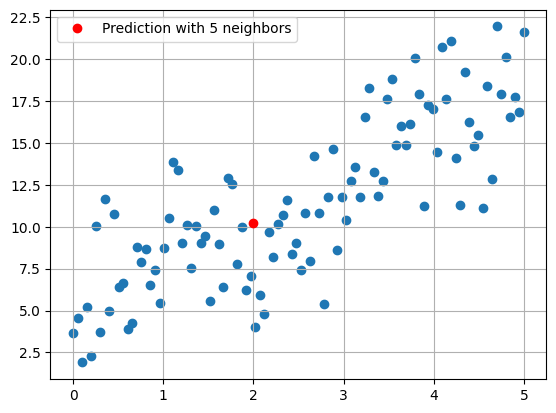

In [8]:
#predicted value with 5 neighbors
plt.scatter(x, y)
plt.plot(2, 10.207196799, 'ro', label = 'Prediction with 5 neighbors')
plt.grid()
plt.legend();

#### Using `sklearn`

The `KNeighborsRegressor` estimator can be used to build the KNN model.  

In [9]:
from sklearn.neighbors import KNeighborsRegressor

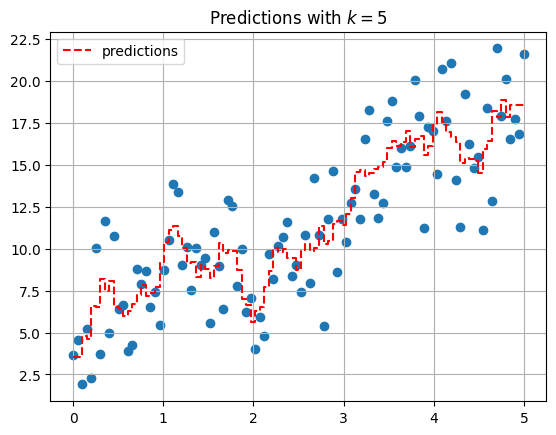

In [10]:
#predict for all data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x.reshape(-1, 1), y)
predictions = knn.predict(x.reshape(-1, 1))
plt.scatter(x, y)
plt.step(x, predictions, '--r', label = 'predictions')
plt.grid()
plt.legend()
plt.title(r'Predictions with $k = 5$');

In [11]:
from ipywidgets import interact 
import ipywidgets as widgets

In [12]:
def knn_explorer(n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(x.reshape(-1, 1), y)
    predictions = knn.predict(x.reshape(-1, 1))
    plt.scatter(x, y)
    plt.step(x, predictions, '--r', label = 'predictions')
    plt.grid()
    plt.legend()
    plt.title(f'Predictions with $k = {n_neighbors}$');

In [14]:
#explore how predictions change as you change k
interact(knn_explorer, n_neighbors = widgets.IntSlider(value = 1, 
                                                       low = 2, 
                                                       high = len(x)));

interactive(children=(IntSlider(value=1, description='n_neighbors'), Output()), _dom_classes=('widget-interact…

### Classification

Unlike regression, classification problems involve predicting a categorical variable.  For example, the breed of dog, whether or not a customer purchases an item, the presence of a disease, and so on.  Today, we will examine the examples of predicting whether or not a person survived the titanic sinking and whether or not a person defaults on their credit card.  For each of these problems, we will use the K-Nearest Neighbors algorithm, which we introduce below.

#### Problem Motivation

In [ ]:
#make data
X, y = make_blobs(centers = 2, cluster_std=2, random_state = 42)

In [ ]:
#create dataframe
data_1 = pd.DataFrame(X, columns = ['X1', 'X2'])
data_1['y'] = y

In [ ]:
#plot sample dataset
sns.scatterplot(data = data_1, x = 'X1', y = 'X2', hue = 'y')
plt.title('Sample Classification Data')
plt.grid();

In [ ]:
#dataset with new point
sns.scatterplot(data = data_1, x = 'X1', y = 'X2', hue = 'y')
plt.title('Sample Classification Data')
plt.plot(3, 4, 'ro', markersize = 10, label = 'New Data')
plt.legend()
plt.grid();

#### The Intuition

KNN relies on the idea of distance and classifying new datapoints based on the new datapoints distance from known data.  There is no equation to be learned as we had with linear regression so we call this a *non-parametric* model.  Essentially, we decide how many points we want to use for voting on the nearness.  Below, we demonstrate this with a small sample of the `titanic` data.

![](images/knn1.png)![](images/knn3.png)

In [15]:
titanic = sns.load_dataset('titanic')

In [16]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [17]:
#take first five rows as a sample
sample_train = titanic[['pclass', 'age', 'survived']].head()
sample_train

pclass   age  survived
0       3  22.0         0
1       1  38.0         1
2       3  26.0         1
3       1  35.0         1
4       3  35.0         0

In [18]:
#select a row as a new example to make a prediction on
new_data = titanic[['pclass', 'age']].iloc[30]

In [19]:
new_data

pclass     1.0
age       40.0
Name: 30, dtype: float64

In [20]:
#distance from new data to first example in sample
np.linalg.norm(sample_train.iloc[0, :2] - new_data)

18.110770276274835

In [21]:
#distance between new data and all sample data points
#apply can be used to apply a function to all rows of a DataFrame
distances = sample_train[['pclass', 'age']].apply(lambda x: np.linalg.norm(x - new_data), axis = 1)
distances

0    18.110770
1     2.000000
2    14.142136
3     5.000000
4     5.385165
dtype: float64

In [22]:
#create a column of distances between data and new observation
sample_train['distance'] = distances

In [23]:
sample_train

pclass   age  survived   distance
0       3  22.0         0  18.110770
1       1  38.0         1   2.000000
2       3  26.0         1  14.142136
3       1  35.0         1   5.000000
4       3  35.0         0   5.385165

In [24]:
#sort by least distance to new data point
sample_train.sort_values('distance')

pclass   age  survived   distance
1       1  38.0         1   2.000000
3       1  35.0         1   5.000000
4       3  35.0         0   5.385165
2       3  26.0         1  14.142136
0       3  22.0         0  18.110770

#### Question

If you determine the outcome based on the 1 nearest neighbor, what would you predict? 3 nearest neighbors?

In [ ]:
titanic.info()

### Using `KNeighborsClassifier`

The `KNeighborsClassifier` works just like the earlier `LinearRegression` estimator.  You will instantiate, fit, predict, and score the model as before.  Additionally, we have a parameter `n_neighbors` that will control how many neighbors we make our classification by.  To begin, let us form our training and testing data using `pclass` and `age` with 5 neighbors.

In [ ]:
# X and y
titanic = titanic.dropna()
X = titanic[['pclass', 'age']]
y = titanic['survived']

In [ ]:
# train/test split
# random_state = 22
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [ ]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# fit
knn.fit(X_train, y_train)

In [ ]:
# score
knn.score(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

#### `.score`

Here, we score the model using the total percent correct or **accuracy**.  Later, we will explore additional metrics for classification but for now this is an intuitive way to score a classifier.  

$$\text{accuracy} = \frac{\text{number correct}}{\text{number total}}$$



### Comparing to Baseline

Typically, you will use the majority class to serve as a baseline predictor.  Here, assume you predict just guessing what the majority class is.  For this example, it is easy to use the `.value_counts(normalize = True)` to create a baseline accuracy.

In [ ]:
X_train.head()

In [ ]:
#baseline
y_train.value_counts(normalize = True)

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
#which was better?
dummy = DummyClassifier().fit(X_train, y_train)
dummy.score(X_train, y_train)

**PROBLEM**

Use `KNeighborsClassifier` to predict the `default` column using `balance` and `income`.  Create a train/test split and report the score on both train and test data.

In [42]:
default = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa25/main/data/Default.csv', index_col = 0)
default.head()

default student      balance        income
1      No      No   729.526495  44361.625074
2      No     Yes   817.180407  12106.134700
3      No      No  1073.549164  31767.138947
4      No      No   529.250605  35704.493935
5      No      No   785.655883  38463.495879

In [44]:
X = default[['balance', 'income']]
y = default['default']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [51]:
#baseline on y_train
y_train.value_counts(normalize=True)

default
No     0.965467
Yes    0.034533
Name: proportion, dtype: float64

In [47]:
knn = KNeighborsClassifier()

### Improving the Model

Now, we can try two things to improve our model.  First, is to change the data we are using and incorporate more features into the model.  To do so, we may want to encode categorical features and use these to feed into the model.  To do so, we again will use `make_column_transformer` and select the categorical features to one-hot-encode, while passing the other features through.

In [53]:
default.head(2)

default student     balance        income
1      No      No  729.526495  44361.625074
2      No     Yes  817.180407  12106.134700

In [54]:
cat_cols = ['student']
num_cols = ['balance', 'income']
#select columns
X = default.loc[:, cat_cols + num_cols]
y = default['default']

In [58]:
#create OHE
ohe = OneHotEncoder(sparse_output = False, drop = 'if_binary')

In [59]:
#transformer
encoder = make_column_transformer((ohe, cat_cols), 
                                  verbose_feature_names_out=False,
                                  remainder='passthrough')

In [99]:
# train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [100]:
# fit and transform train
X_train_encoded = encoder.fit_transform(X_train)

In [101]:
encoder.get_feature_names_out()

array(['onehotencoder__student_Yes', 'remainder__balance',
       'remainder__income'], dtype=object)

In [102]:
# transform the test
X_test_encoded = encoder.transform(X_test)

In [103]:
# instantiate the KNN estimator
knn = KNeighborsClassifier(n_neighbors=1)

In [104]:
# fit on train
knn.fit(X_train_encoded, y_train)

KNeighborsClassifier(n_neighbors=1)

In [105]:
# score on test
knn.score(X_test_encoded, y_test)

0.9556

In [106]:
y_train.value_counts(normalize = True)

default
No     0.966533
Yes    0.033467
Name: proportion, dtype: float64

### Another Important Transformation

In addition to using the `OneHotEncoder` to encode the categorical features, existing numeric features need to be put on the same scale.  To do this, we convert the data to $z$-scores, computed by:

$$z = \frac{x_i - \mu}{\sigma}$$

You can accomplish this transformation using the `StandardScaler`.  One way to streamline this is to replace the `passthrough` argument in the `make_column_transformer`.

In [107]:
# transformer for scaling
encoder = make_column_transformer((ohe, cat_cols), 
                                  remainder=StandardScaler())

In [108]:
# fit and transform
X_train_encoded = encoder.fit_transform(X_train)
# transform
X_test_encoded = encoder.transform(X_test)

In [109]:
# instantiate and fit
knn = KNeighborsClassifier().fit(X_train_encoded, y_train)

In [110]:
# score train and test
print(knn.score(X_train_encoded, y_train))
print(knn.score(X_test_encoded, y_test))

0.976
0.9684


### Streamlining data preparation and modeling with `Pipeine`

The `Pipeline` object allows you to chain together different transformers and estimator objects from scikitlearn.  In our example, this involves first using the `make_column_transformer` and then to `KNearestNeighbor` classifier.  See the user guide [here](https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators) for more examples.

In [111]:
# create a Pipeline
pipe = Pipeline([('encode', encoder), 
                 ('knn', knn)])

In [112]:
# fit the train data
pipe.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['student'])])),
                ('knn', KNeighborsClassifier())])

In [113]:
# score the train and test
pipe.score(X_train, y_train)

0.976

### Visualizing Performance

`sklearn` offers a few visualizers for evaluating a classification model.  An important starting one is the `ConfusionMatrixDisplay` tool, demonstrated below.

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

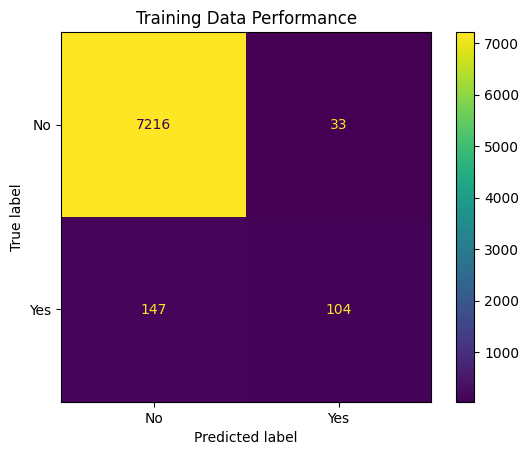

In [118]:
cmat = ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)
plt.title('Training Data Performance');

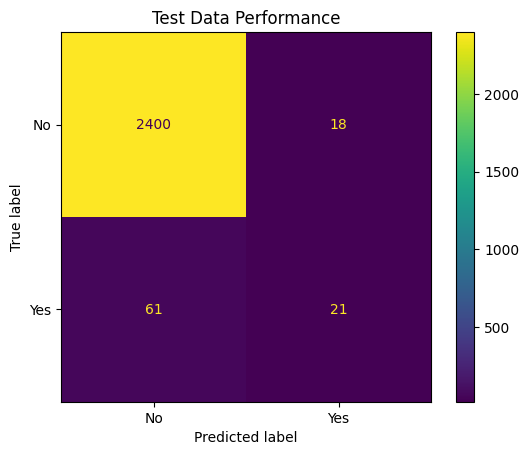

In [120]:
cmat2 = ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)
plt.title('Test Data Performance');

#### Summary

While the KNN model is easy to understand and implement, there are many other classification algorithms that frequently will perform better and contain interpretable parameters.  Next class, we will examine one such example with `LogisticRegression` and the following week we will examine tree models and ensembles.